In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1).sample(1000000)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,...,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,Regiao,Renda_per_capta,Pessoas_por_quarto,Pessoas_por_computador,Celulares_por_pessoa
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,16.576486,0.411018,1.068563,2.137908,0.390177,0.448753,0.526688,19.956088,2.863367,3.341073,...,0.213865,2.399418,0.240433,0.688605,0.778357,2.215447,834.965026,1.870122,1.821105,0.673469
std,7.979130,0.492019,0.416661,1.011570,0.494469,0.614529,0.499287,7.181815,3.968348,1.957595,...,0.410033,1.069863,0.427347,0.771837,0.415352,1.508939,1248.893406,0.993069,1.986908,0.310741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,299.400000,1.333333,0.000000,0.500000
50%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,17.000000,1.000000,3.000000,...,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,499.000000,1.666667,1.333333,0.666667
75%,25.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,21.000000,4.000000,5.000000,...,0.000000,3.000000,0.000000,1.000000,1.000000,4.000000,831.666667,2.000000,3.500000,1.000000
max,26.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,85.000000,13.000000,7.000000,...,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,30000.000000,20.000000,20.000000,4.000000


## Feature importance

### Correlation Matrix

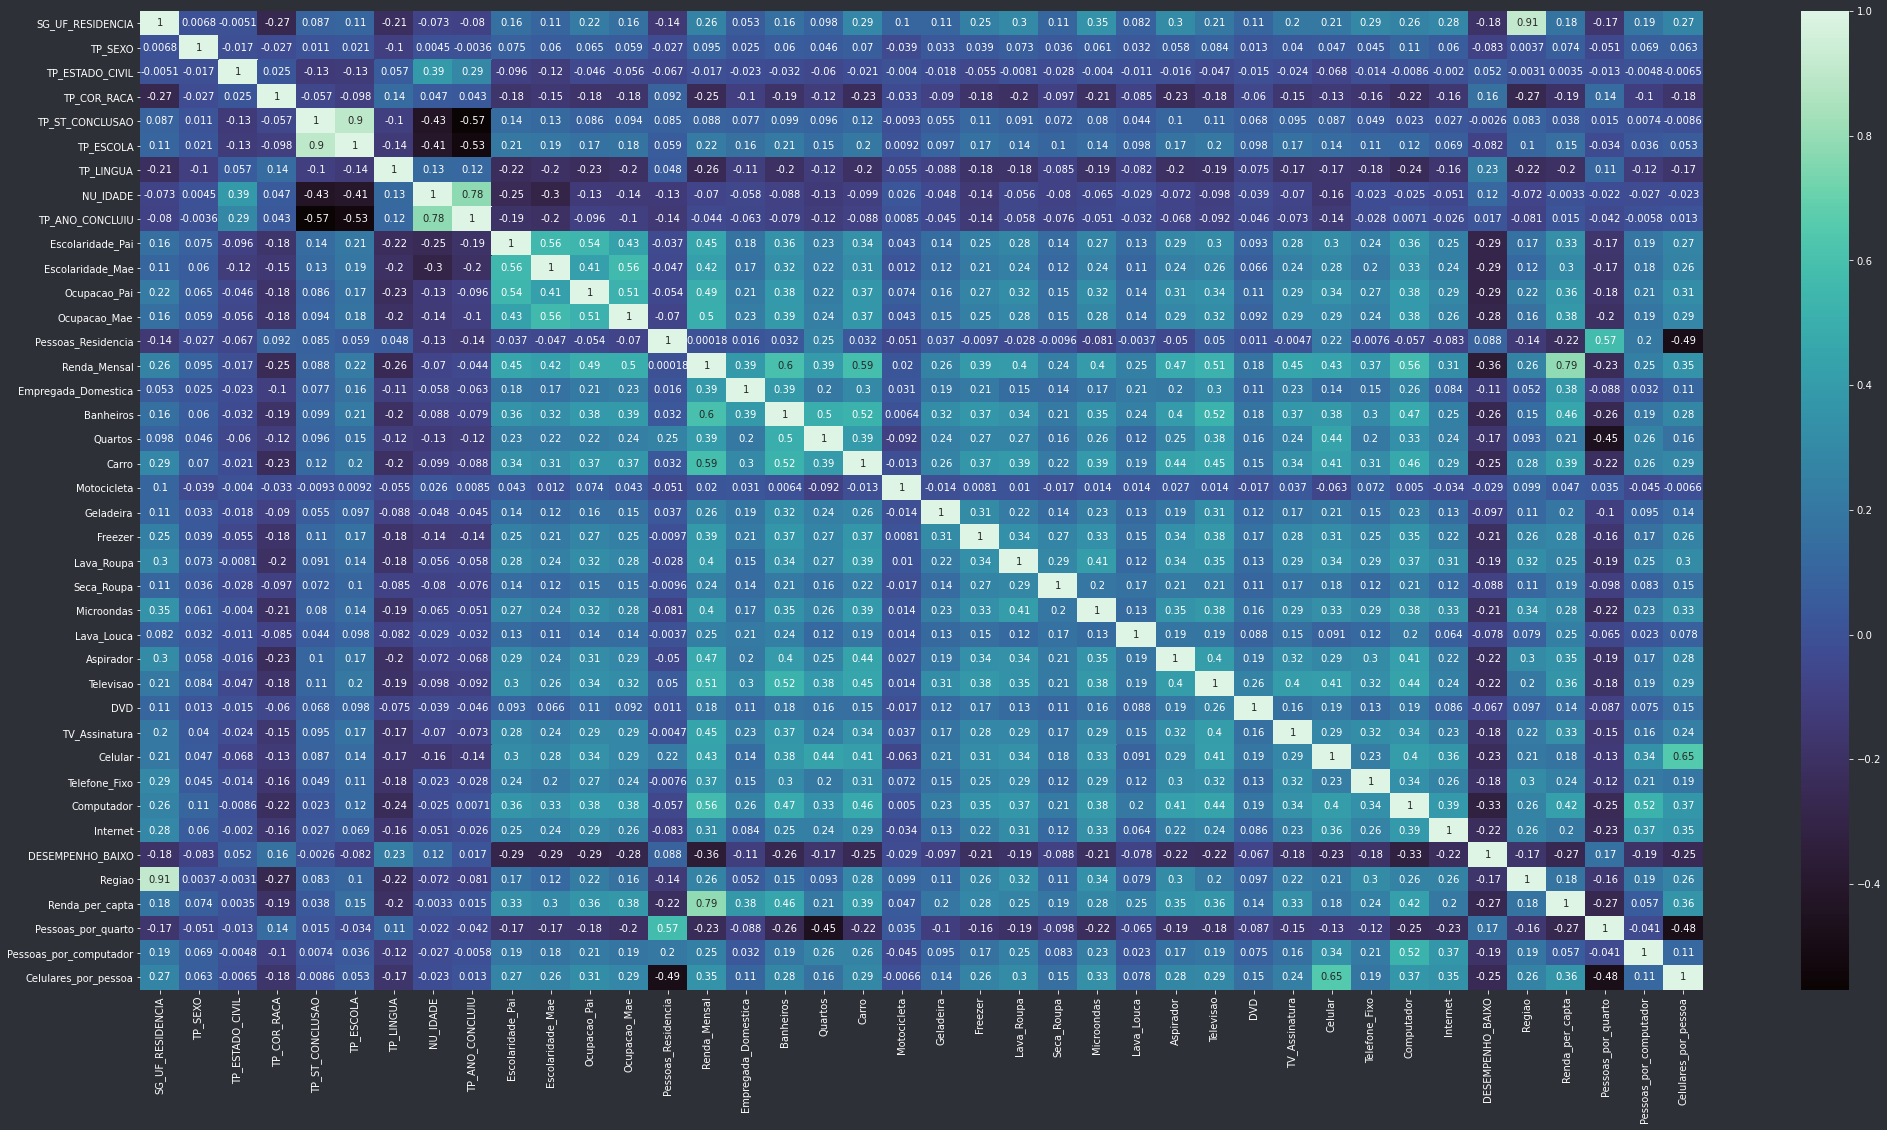

In [3]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 18))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 18), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.heatmap(data.corr(),annot=True,cmap="mako")
plt.savefig("../pictures/Matriz_correlação.png")

### Gini index

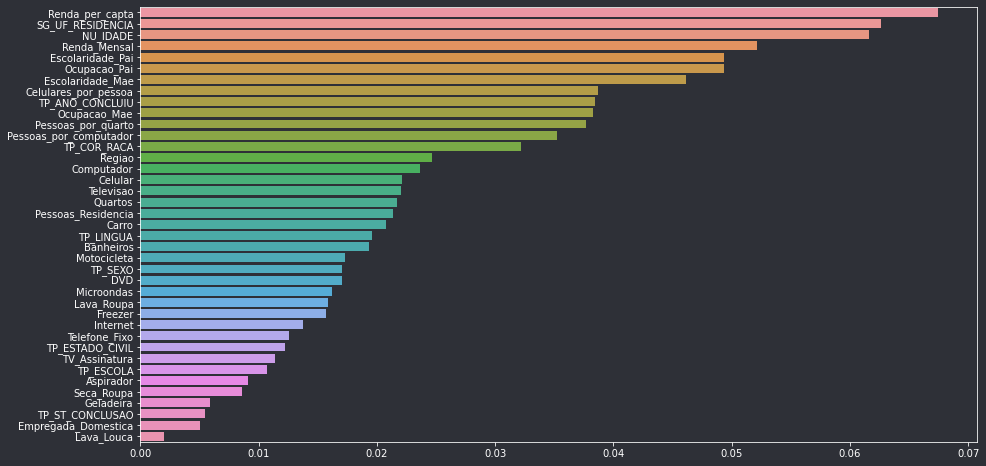

In [4]:
model = RandomForestClassifier(n_jobs = -1).fit(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.barplot(x = gini_importance, y = gini_importance.index)
plt.savefig("../pictures/Gini.png")

### Mutual Information method

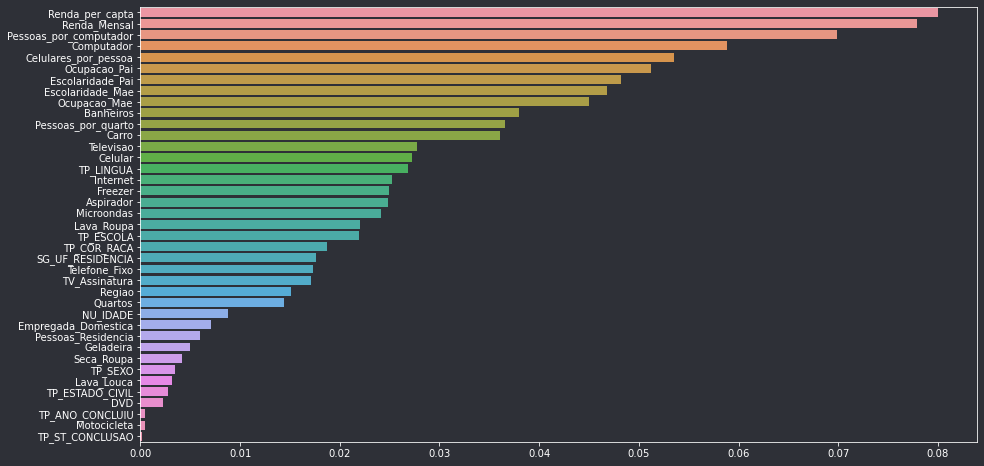

In [5]:
train, test = train_test_split(data, test_size=0.30)

continuous = ["Renda_per_capta", "Pessoas_por_quarto", "Pessoas_por_computador", "Celulares_por_pessoa"]

mi = mutual_info_classif(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"], 
                         discrete_features = [col not in continuous for col in data.drop("DESEMPENHO_BAIXO", 1).columns])
mi_importance = pd.Series(mi, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
mi_importance.sort_values(ascending=False,inplace=True)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.barplot(x = mi_importance, y = mi_importance.index)
plt.savefig("../pictures/Mutual_Information.png")

### Permutation Importance

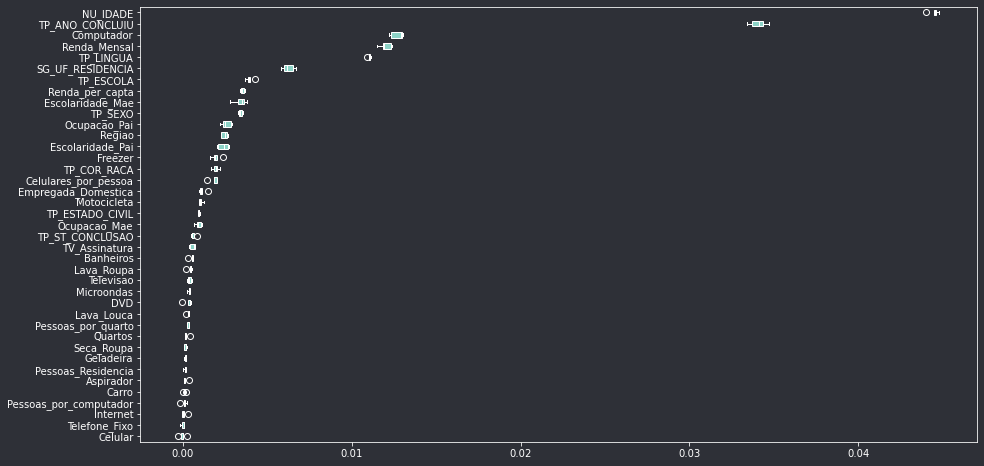

In [6]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

permutation_importance = pd.Series(r.importances_mean[sorted_idx], index = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
plt.savefig("../pictures/Permutation_XGBoost.png")

## Recursive Feature Elimination

### Removing Least important features according to Gini

Recall when using complete dataset: 74.96%. Precision: 70.42%
Recall when removing 1 variables: 74.91%. Precision: 70.45%
Recall when removing 2 variables: 74.99%. Precision: 70.4%
Recall when removing 3 variables: 74.98%. Precision: 70.41%
Recall when removing 4 variables: 74.88%. Precision: 70.33%
Recall when removing 5 variables: 74.94%. Precision: 70.39%
Recall when removing 6 variables: 74.83%. Precision: 70.39%
Recall when removing 7 variables: 74.38%. Precision: 70.34%
Recall when removing 8 variables: 74.46%. Precision: 70.39%
Recall when removing 9 variables: 74.52%. Precision: 70.29%
Recall when removing 10 variables: 74.49%. Precision: 70.29%
Recall when removing 11 variables: 74.46%. Precision: 70.31%
Recall when removing 12 variables: 74.14%. Precision: 70.29%
Recall when removing 13 variables: 74.23%. Precision: 70.22%
Recall when removing 14 variables: 74.19%. Precision: 70.21%
Recall when removing 15 variables: 74.22%. Precision: 70.19%
Recall when removing 16 variables

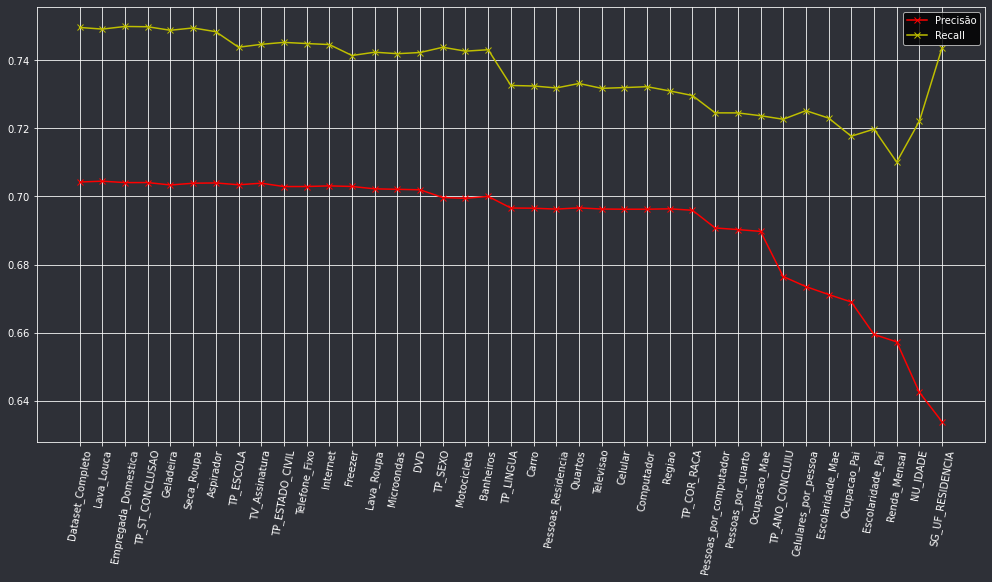

In [7]:
l_precision = []
l_recall = []
l_labels = []

gini_importance.sort_values(ascending = True, inplace = True)
train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

for i, remove_col in enumerate(gini_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Gini_recursivo.png")

### Removing Least important features according to Mutual Information

Recall when using complete dataset: 74.96%. Precision: 70.42%
Recall when removing 1 variables: 74.89%. Precision: 70.44%
Recall when removing 2 variables: 74.88%. Precision: 70.46%
Recall when removing 3 variables: 74.64%. Precision: 69.8%
Recall when removing 4 variables: 74.8%. Precision: 69.72%
Recall when removing 5 variables: 74.71%. Precision: 69.74%
Recall when removing 6 variables: 74.69%. Precision: 69.68%
Recall when removing 7 variables: 74.72%. Precision: 69.65%
Recall when removing 8 variables: 74.71%. Precision: 69.61%
Recall when removing 9 variables: 74.7%. Precision: 69.63%
Recall when removing 10 variables: 74.69%. Precision: 69.61%
Recall when removing 11 variables: 74.74%. Precision: 69.52%
Recall when removing 12 variables: 75.26%. Precision: 68.71%
Recall when removing 13 variables: 75.28%. Precision: 68.72%
Recall when removing 14 variables: 75.28%. Precision: 68.7%
Recall when removing 15 variables: 75.18%. Precision: 68.73%
Recall when removing 16 variables: 7

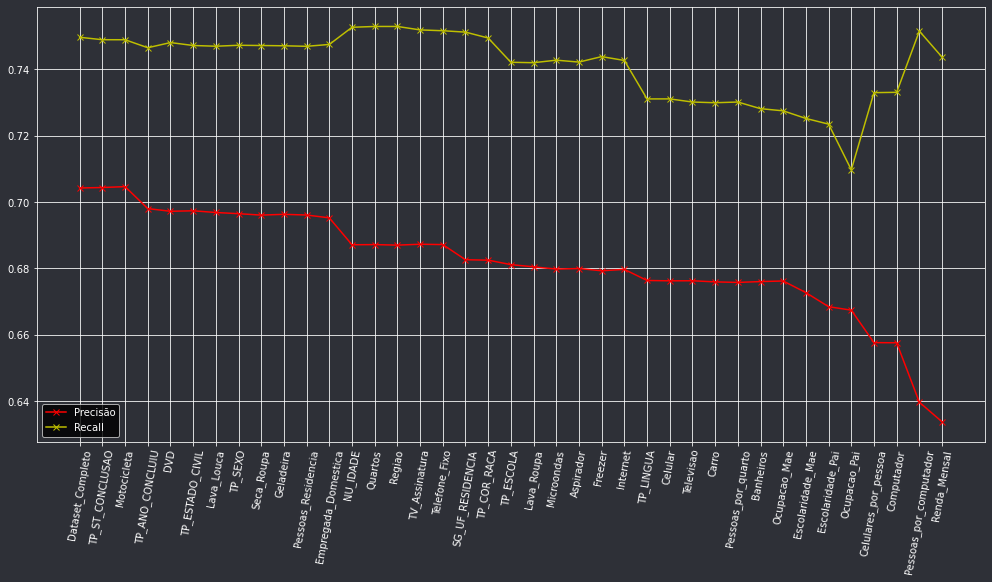

In [8]:
l_precision = []
l_recall = []
l_labels = []

mi_importance.sort_values(ascending=True,inplace=True)
train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

for i, remove_col in enumerate(mi_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/MI_recursivo.png")

### Removing Least important features according to Permutation Importance

Recall when using complete dataset: 74.96%.
Recall when removing 1 variables: 74.96%. Precision: 70.45%
Recall when removing 2 variables: 74.78%. Precision: 70.47%
Recall when removing 3 variables: 74.9%. Precision: 70.45%
Recall when removing 4 variables: 74.88%. Precision: 70.48%
Recall when removing 5 variables: 75.0%. Precision: 70.47%
Recall when removing 6 variables: 74.89%. Precision: 70.51%
Recall when removing 7 variables: 74.98%. Precision: 70.47%
Recall when removing 8 variables: 74.88%. Precision: 70.42%
Recall when removing 9 variables: 74.92%. Precision: 70.45%
Recall when removing 10 variables: 74.97%. Precision: 70.41%
Recall when removing 11 variables: 74.9%. Precision: 70.42%
Recall when removing 12 variables: 74.96%. Precision: 70.4%
Recall when removing 13 variables: 74.88%. Precision: 70.41%
Recall when removing 14 variables: 74.91%. Precision: 70.44%
Recall when removing 15 variables: 74.89%. Precision: 70.43%
Recall when removing 16 variables: 74.85%. Precision: 

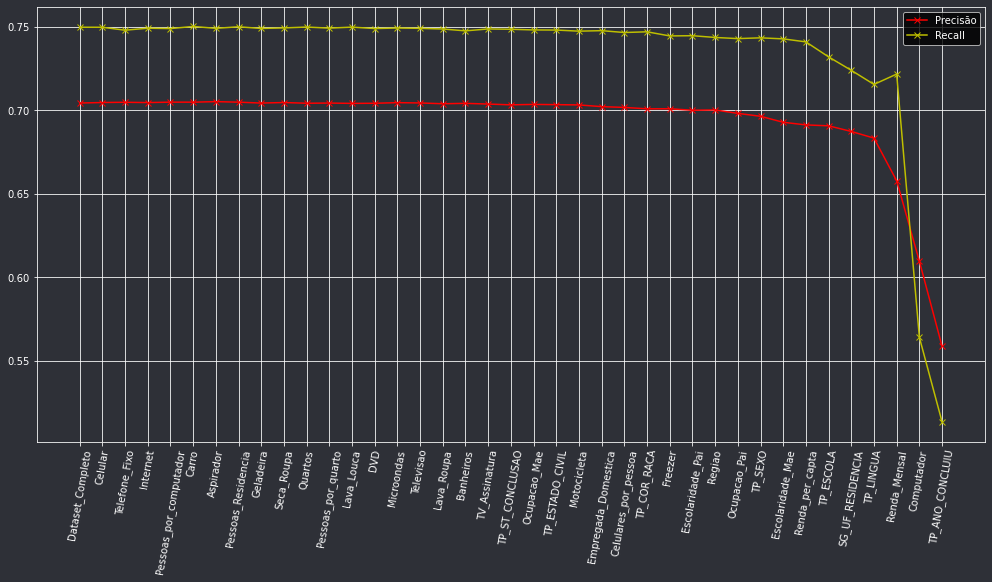

In [9]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%.")

for i, remove_col in enumerate(permutation_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Permutação_recursivo.png")

## Backward Feature Selection

#### Using Precision micro as reference

Recall using complete dataset: 74.96%. Precision: 70.42%.
Recall when removing Geladeira: 74.93%. Precision: 70.52%.
Recall when removing Computador: 74.88%. Precision: 70.51%.
Recall when removing TP_ST_CONCLUSAO: 74.86%. Precision: 70.55%.
Recall when removing Lava_Roupa: 74.81%. Precision: 70.56%.
Recall when removing Microondas: 74.81%. Precision: 70.53%.
Recall when removing Quartos: 74.85%. Precision: 70.53%.
Recall when removing TV_Assinatura: 74.74%. Precision: 70.52%.
Recall when removing Televisao: 74.76%. Precision: 70.48%.
Recall when removing DVD: 74.77%. Precision: 70.5%.
Recall when removing Internet: 74.85%. Precision: 70.46%.
Recall when removing Pessoas_Residencia: 74.7%. Precision: 70.48%.
Recall when removing Aspirador: 74.71%. Precision: 70.49%.
Recall when removing Telefone_Fixo: 74.81%. Precision: 70.48%.
Recall when removing TP_ESTADO_CIVIL: 74.79%. Precision: 70.48%.
Recall when removing Celular: 74.8%. Precision: 70.47%.
Recall when removing Banheiros: 74.59%.

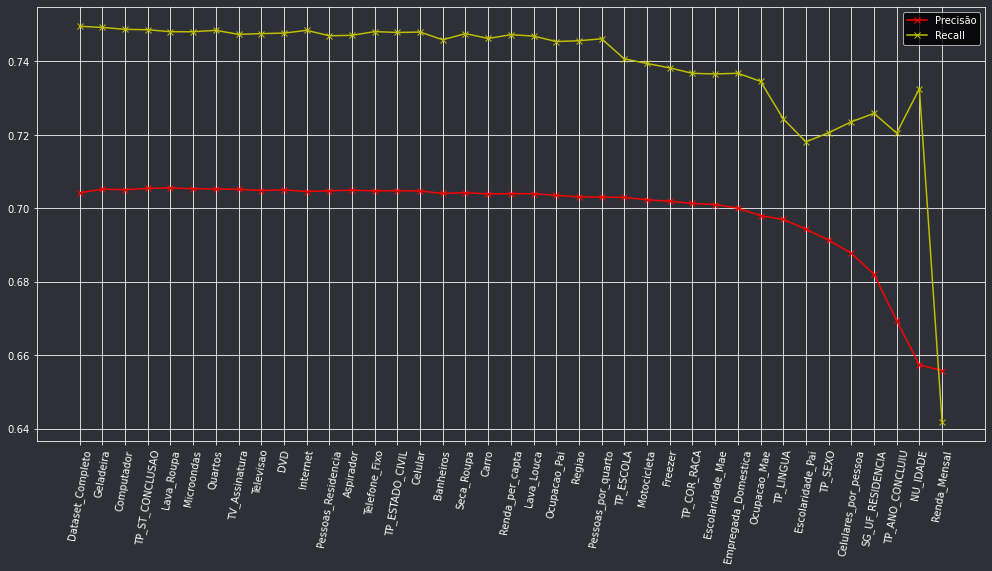

In [10]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train[:]
test_temp = test[:]

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo") 

print("Recall using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%.")

while len(train_temp.columns) > 2:
    
    
    features = train_temp.drop("DESEMPENHO_BAIXO", 1).columns[:]
    list_of_precision = []
    list_of_recall = []
    list_of_precision_micro = []
    
    for feature in features:

        test_temp.drop(feature, 1, inplace = True)
        train_temp.drop(feature, 1, inplace = True)

        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop("DESEMPENHO_BAIXO", 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop("DESEMPENHO_BAIXO", 1))

        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        precision_micro = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "micro")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        
        list_of_precision.append(precision)
        list_of_precision_micro.append(precision)
        list_of_recall.append(recall)  
        
        train_temp[feature] = train[feature]
        test_temp[feature] = test[feature] 
    
    best_precision = 0

    for i, feature in enumerate(features):

        if list_of_precision_micro[i] > best_precision:
            best_precision = list_of_precision[i]
            best_recall = list_of_recall[i]
            best_feature = feature

    train_temp.drop(best_feature, 1, inplace = True)
    test_temp.drop(best_feature, 1, inplace = True)
    
    l_precision.append(best_precision)
    l_recall.append(best_recall)
    l_labels.append(best_feature) 
    
    print("Recall when removing " + best_feature + ": " + str(round(best_recall*100, 2)) + "%. Precision: " + str(round(best_precision*100, 2)) + "%.")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/BackwardSelection.png")

## Removing features

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)
removed_features = ["Celular", "Telefone_Fixo", "Internet", "Pessoas_por_computador", "Carro", "Aspirador", 
                    "Pessoas_Residencia", "Geladeira", "Seca_Roupa", "Quartos", "Pessoas_por_quarto", "Lava_Louca", "DVD",
                    "Microondas", "Televisao", "Lava_Roupa", "Banheiros", "TV_Assinatura", "TP_ST_CONCLUSAO", "Ocupacao_Mae",
                    "TP_ESTADO_CIVIL", "Motocicleta"]
data.drop(removed_features, 1, inplace = True)
train, test = train_test_split(data, test_size=0.30)

## Permutation Importance of final features

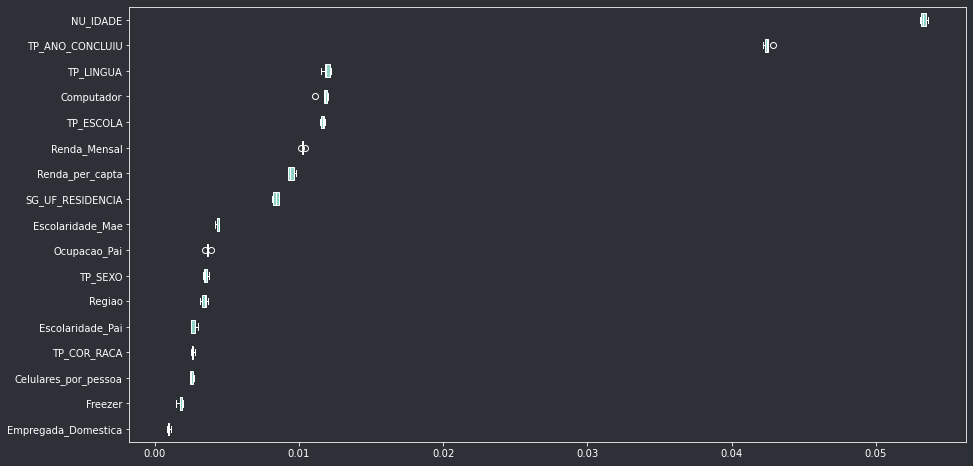

In [3]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

## Saving data

In [8]:
data.to_csv("../dataset/dataset_3.csv", sep = ";")